In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fft import fft, fftfreq

In [2]:
def dsb_amplitude_modulation(carrier_freq, modulating_signal, modulation_index, large_carrier=False):
    time = np.arange(0, 1, 1/sample_rate)
    carrier_wave = np.cos(2 * np.pi * carrier_freq * time)
    if large_carrier:
        modulated_wave = (1 + modulation_index * modulating_signal) * carrier_wave
    else:
        modulated_wave = modulating_signal * carrier_wave
    return modulated_wave

In [3]:
def plot_spectrum(signal, title):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sample_rate)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.stem(xf, np.abs(yf), ".")
    ax1.set_title(f'Amplitude Spectrum - {title}')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Amplitude')

    ax2.stem(xf, np.angle(yf), ".")
    ax2.set_title(f'Phase Spectrum - {title}')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Phase (radians)')

    plt.show()

#### This script takes a modulated signal and carrier frequency as inputs and outputs a demodulated signal. First, it multiplies the modulated signal by the carrier wave to retrieve the original signal (still containing high frequency components). Then it uses a low-pass filter to remove these high frequency components and returns the resulting signal. This filter design is a simple Butterworth design. Please note that the proper choice of the cut-off frequency for the low-pass filter depends on the actual signal and the modulation scheme.

#### Note that this method assumes the carrier is perfectly known, which may not always be the case in real world situations. Also, it's not designed to handle overmodulation. You'll need a more sophisticated scheme to handle those cases.

#### Moreover, this code does not handle noise. In a real-world scenario, your modulated signal will likely be corrupted by noise, and you'll need a more sophisticated demodulation scheme to handle that.

In [4]:
# Use low pass filter to remove the high frequency components
from scipy.signal import butter, lfilter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [5]:
import numpy as np

def dsb_demodulation(carrier_freq, modulated_signal, sample_rate):
    time = np.arange(0, 1, 1/sample_rate)
    carrier_wave = np.cos(2 * np.pi * carrier_freq * time)

    # Multiply the modulated signal by the carrier to retrieve the signal
    demodulated_signal = modulated_signal * carrier_wave
    #demodulated_signal = butter_lowpass_filter(demodulated_signal, carrier_freq, sample_rate)

    return demodulated_signal


#### DSB modulator

In [6]:
sample_rate = 100
#modulating_freq = 50
#carrier_freq = 1000
modulation_index = 0.5
modulating_freq = 1
carrier_freq = 10

time = np.arange(0, 1, 1/sample_rate)
modulating_signal = np.cos(2 * np.pi * modulating_freq * time)

dsb_am = dsb_amplitude_modulation(carrier_freq, modulating_signal, modulation_index, large_carrier=False)

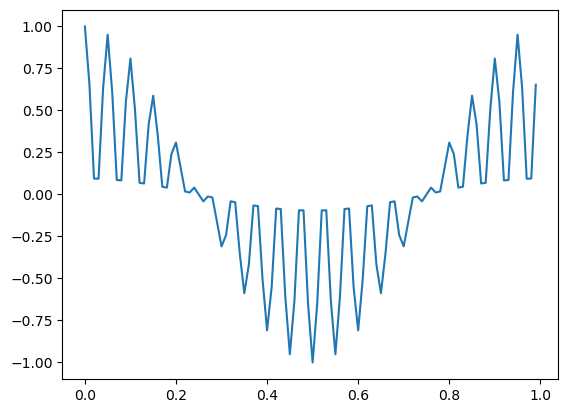

In [7]:
demod_signal = dsb_demodulation(carrier_freq, dsb_am, sample_rate)
plt.plot(time, demod_signal)

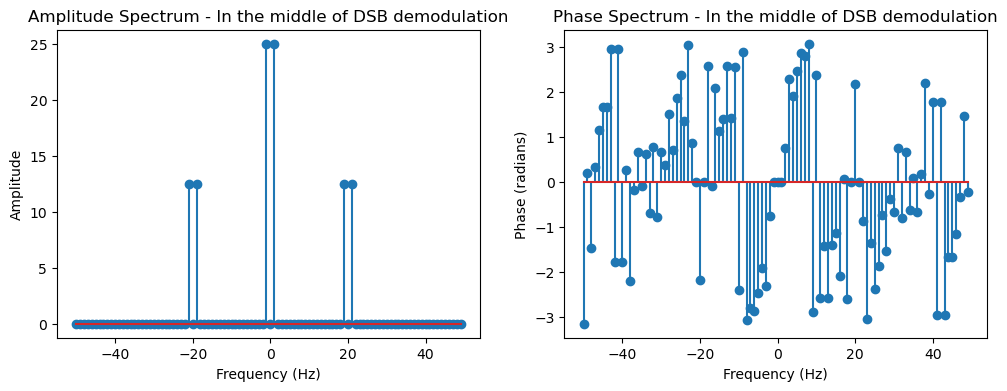

In [8]:
plot_spectrum(demod_signal, 'In the middle of DSB demodulation')

In [9]:
def dsb_demodulation(carrier_freq, modulated_signal, sample_rate):
    time = np.arange(0, 1, 1/sample_rate)
    carrier_wave = np.cos(2 * np.pi * carrier_freq * time)

    # Multiply the modulated signal by the carrier to retrieve the signal
    demodulated_signal = modulated_signal * carrier_wave
    demodulated_signal = butter_lowpass_filter(demodulated_signal, carrier_freq, sample_rate)

    return demodulated_signal

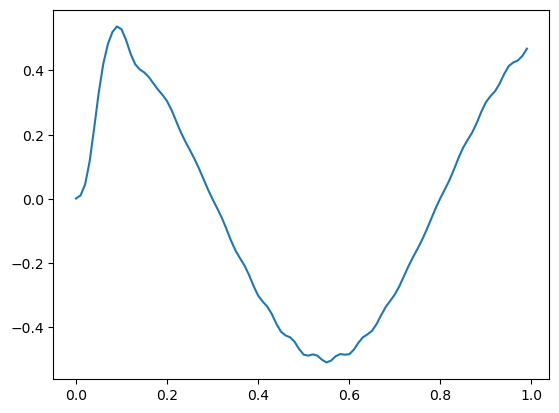

In [10]:
demod_signal = dsb_demodulation(carrier_freq, dsb_am, sample_rate)
plt.plot(time, demod_signal)

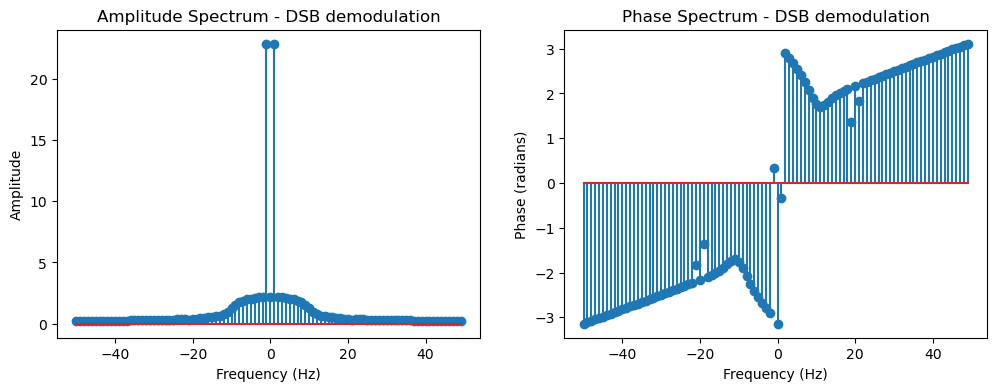

In [11]:
plot_spectrum(demod_signal, 'DSB demodulation')

#### cut-off frequency = carrier frequency / 2

In [12]:
def dsb_demodulation(carrier_freq, modulated_signal, sample_rate):
    time = np.arange(0, 1, 1/sample_rate)
    carrier_wave = np.cos(2 * np.pi * carrier_freq * time)

    # Multiply the modulated signal by the carrier to retrieve the signal
    demodulated_signal = modulated_signal * carrier_wave
    demodulated_signal = butter_lowpass_filter(demodulated_signal, carrier_freq/2, sample_rate)

    return demodulated_signal

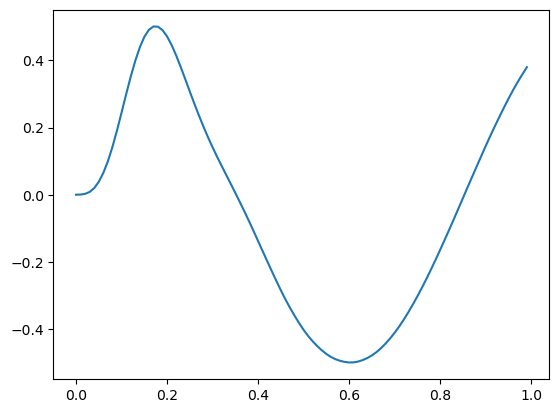

In [13]:
demod_signal = dsb_demodulation(carrier_freq, dsb_am, sample_rate)
plt.plot(time, demod_signal)

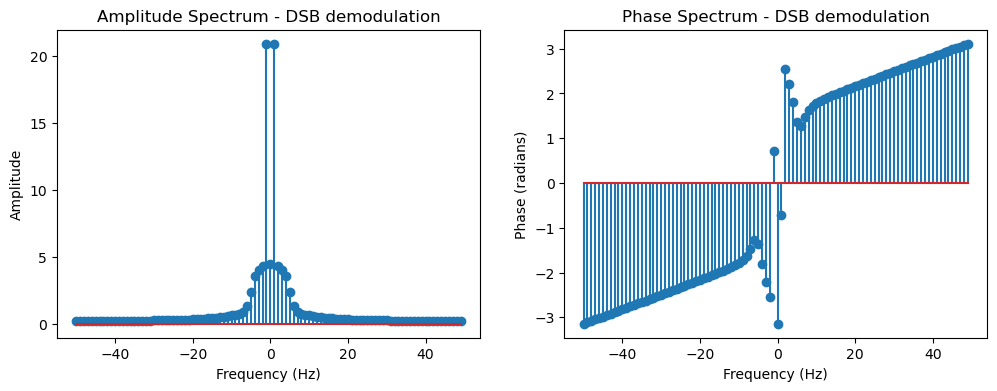

In [14]:
plot_spectrum(demod_signal, 'DSB demodulation')